In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('CSV/train_drugsentiment.csv')

In [4]:
df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [7]:
df.drop('unique_hash',axis=1,inplace=True)

In [11]:
df['sentiment']=df['sentiment'].apply(lambda x:0 if x==1 else x)

In [12]:
df['sentiment']=df['sentiment'].apply(lambda x:1 if x==2 else x)

In [14]:
df['length']=df['text'].apply(len)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<AxesSubplot: xlabel='length', ylabel='Count'>

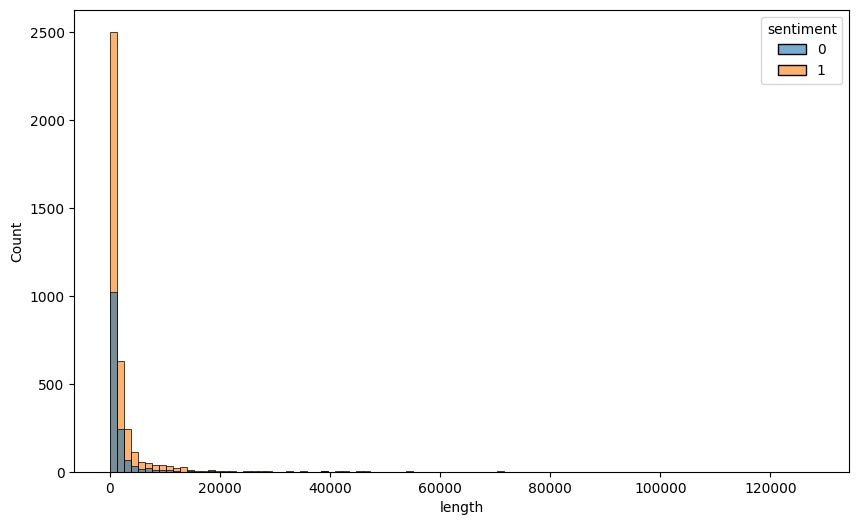

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(hue='sentiment',x='length',data=df,alpha=.6,bins=100)

In [23]:
df['length'].describe()

count      5279.000000
mean       2075.701080
std        5075.540253
min           6.000000
25%         419.000000
50%         807.000000
75%        1706.000000
max      127948.000000
Name: length, dtype: float64

In [24]:
import string
from nltk.corpus import stopwords

In [25]:
def text_process(mess):
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [31]:
bow_transform=CountVectorizer(analyzer=text_process).fit(df['text'])
bow_text=bow_transform.transform(df['text'])

In [39]:
transformer=TfidfTransformer().fit(bow_text)
tfidf_text=transformer.transform(bow_text)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
sentiment_model=MultinomialNB().fit(tfidf_text,df['sentiment'])

In [35]:
test_df=pd.read_csv('CSV/test_drugssentiment.csv')

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_hash  2924 non-null   object
 1   text         2924 non-null   object
 2   drug         2924 non-null   object
dtypes: object(3)
memory usage: 68.7+ KB


In [43]:
test_bow_text=bow_transform.transform(test_df['text'])
test_tfidf_text=transformer.transform(test_bow_text)

In [44]:
predictions=sentiment_model.predict(test_tfidf_text)

In [55]:
class_names = ['1', '0']